# 4. Training Models Notes

## Linear Regression

Linear Regression is statistical method used to examine the relationship between two or more continous variables - one independent variable (e.g squre footage) and one dependent variable (price). The goal of linear regression is to find the best fitting lione throguh a set of data points which can then be used to make predictions about future observations.

Mathimatically, a linear model makes a prediction by simply computing a weighted sum of it's input features, plus a constant called the bias term. In a vectorized format, the equation can be expressed as:

`y = h0(X) = 0 * X`


### How do we train it?

The most common method train a regression model is Root Mean Squared Error of the predictions, meaning we need to find the values of parameter vector such that they minimize the RMSE.

There are two ways to accomplish this

    1. *The Normal Equation (closed form solution)*
    2. *Gradient Descent*
    
### The Normal Equation

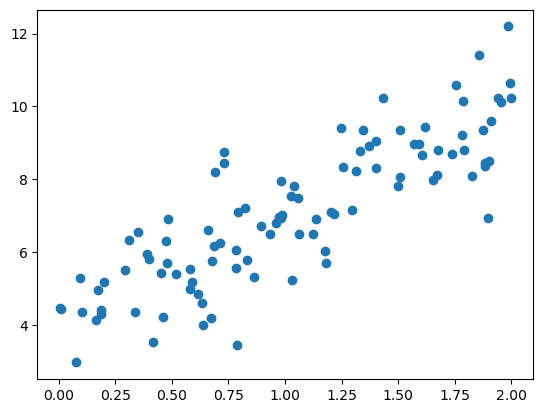

In [10]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

X = 2 * np.random.rand(100,1)
y = 4 + (3 * X) + np.random.randn(100,1)

plt.scatter(X,y)

In [13]:
X_b = np.c_[np.ones((100,1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

theta_best

array([[4.05620691],
       [2.92819386]])

The ideal parameters would have been 4 & 3 since that was the parameters in our original equation, but the Gaussian noise (e.g `np.random.randn(100,1)`  made it impossible to get an exact match.

But now we can make predictions:

In [15]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new] # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.05620691],
       [9.91259462]])

(0.0, 2.0, 0.0, 15.0)

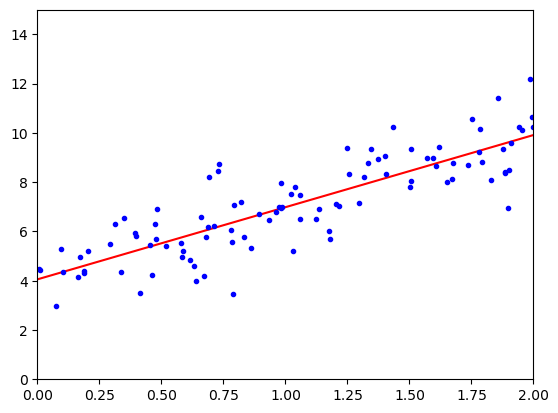

In [19]:
plt.plot(X_new, y_predict, 'r-')
plt.plot(X, y, 'b.')
plt.axis([0, 2, 0, 15])

### Implementing the Linear Regression Model

In [23]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X,y)
print(lin_reg.intercept_, lin_reg.coef_)

lin_reg.predict(X_new)

[4.05620691] [[2.92819386]]


array([[4.05620691],
       [9.91259462]])

## Gradient Descent

For cases where there is a large number of features or too many training instances to fit in memory, Gradient Descent is the more performant approach to find theta.

The idea of GD is to tweak parameters iteratively in order to minimze the cost function (e.g MSE) the maximum minimum. GD starts with two inputs:

    1. Random Initilization Value - picking random parameter values to start the descent.
    2. Learning Rate: How big of a step should the algorith take with each iteration.
    
If you're learning rate is too small, then the algorithm will have to go many iterations to converge, which will take a look time. However, if the learning rate is too big, the algorithm might diverge by complelty overshooting the desired minimum MSE. 

